In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('samsum_csv_data/train.csv')

In [3]:
train_data.head()

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\nJ...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\nKim: Bad mood tbh, I was ...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\nSam: i...,"Sam is confused, because he overheard Rick com..."


In [4]:
train_data.shape

(14732, 3)

In [4]:
test = pd.read_csv('samsum_csv_data/test.csv')
validate = pd.read_csv('samsum_csv_data/validation.csv')

test.shape, validate.shape

# 16369 total records, 5% test 5% validate

((819, 3), (818, 3))

In [4]:
train = train_data

In [7]:
def add_text_features(df):
    df["summary_char_len"] = df["summary"].astype(str).apply(len)
    df["dialogue_char_len"] = df["dialogue"].astype(str).apply(len)
    df["dialogue_num_lines"] = df["dialogue"].astype(str).apply(lambda x: x.count("\n") + 1 if x.strip() else 0)
    return df

train = add_text_features(train)
validate = add_text_features(validate)
test = add_text_features(test)

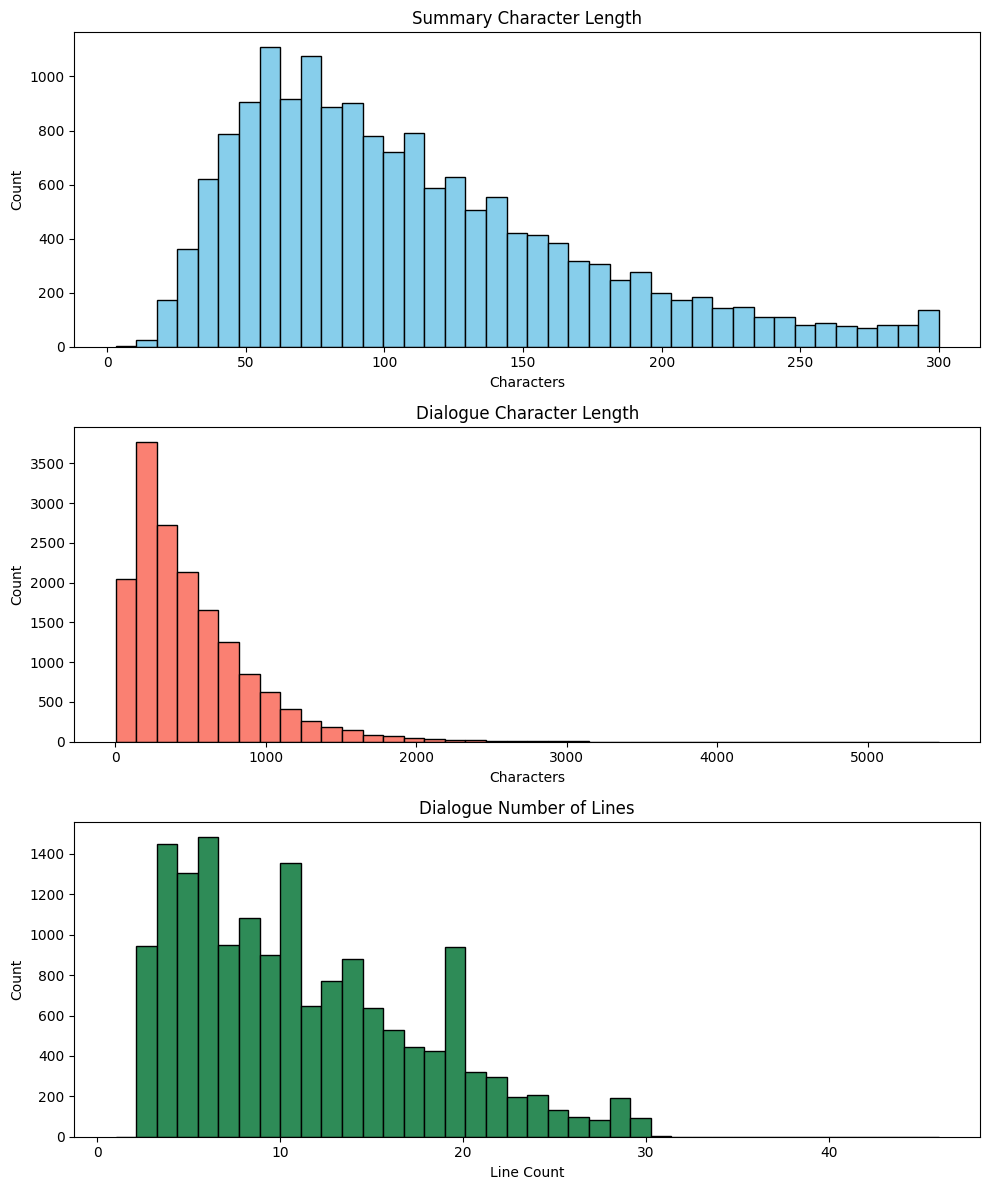

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine all sets into one DataFrame for unified plotting
combined = pd.concat([train, validate, test], ignore_index=True)

# Plot histograms
fig, axes = plt.subplots(3, 1, figsize=(10, 12), tight_layout=True)

axes[0].hist(combined["summary_char_len"], bins=40, color="skyblue", edgecolor="black")
axes[0].set_title("Summary Character Length")
axes[0].set_xlabel("Characters")
axes[0].set_ylabel("Count")

axes[1].hist(combined["dialogue_char_len"], bins=40, color="salmon", edgecolor="black")
axes[1].set_title("Dialogue Character Length")
axes[1].set_xlabel("Characters")
axes[1].set_ylabel("Count")

axes[2].hist(combined["dialogue_num_lines"], bins=40, color="seagreen", edgecolor="black")
axes[2].set_title("Dialogue Number of Lines")
axes[2].set_xlabel("Line Count")
axes[2].set_ylabel("Count")

plt.show()


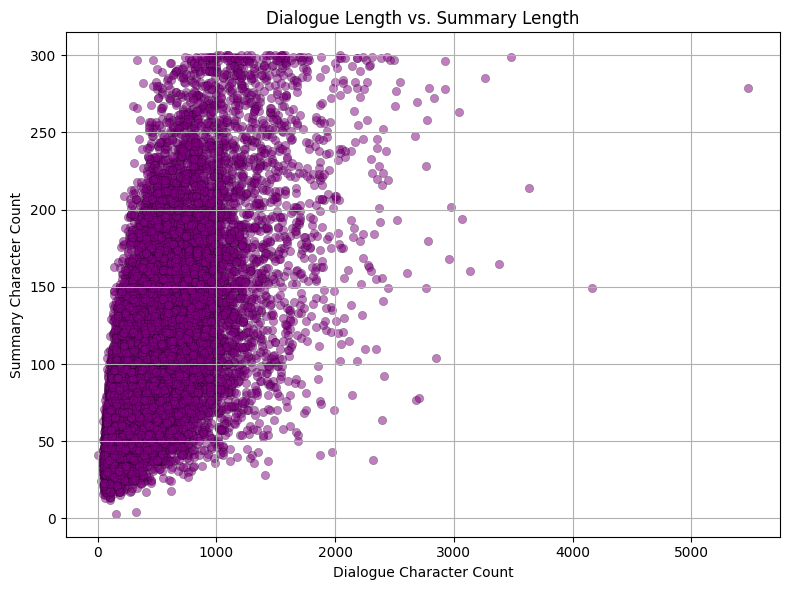

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(combined["dialogue_char_len"], combined["summary_char_len"], 
            alpha=0.5, color="purple", edgecolor="black", linewidth=0.3)

plt.title("Dialogue Length vs. Summary Length")
plt.xlabel("Dialogue Character Count")
plt.ylabel("Summary Character Count")
plt.grid(True)
plt.tight_layout()
plt.show()

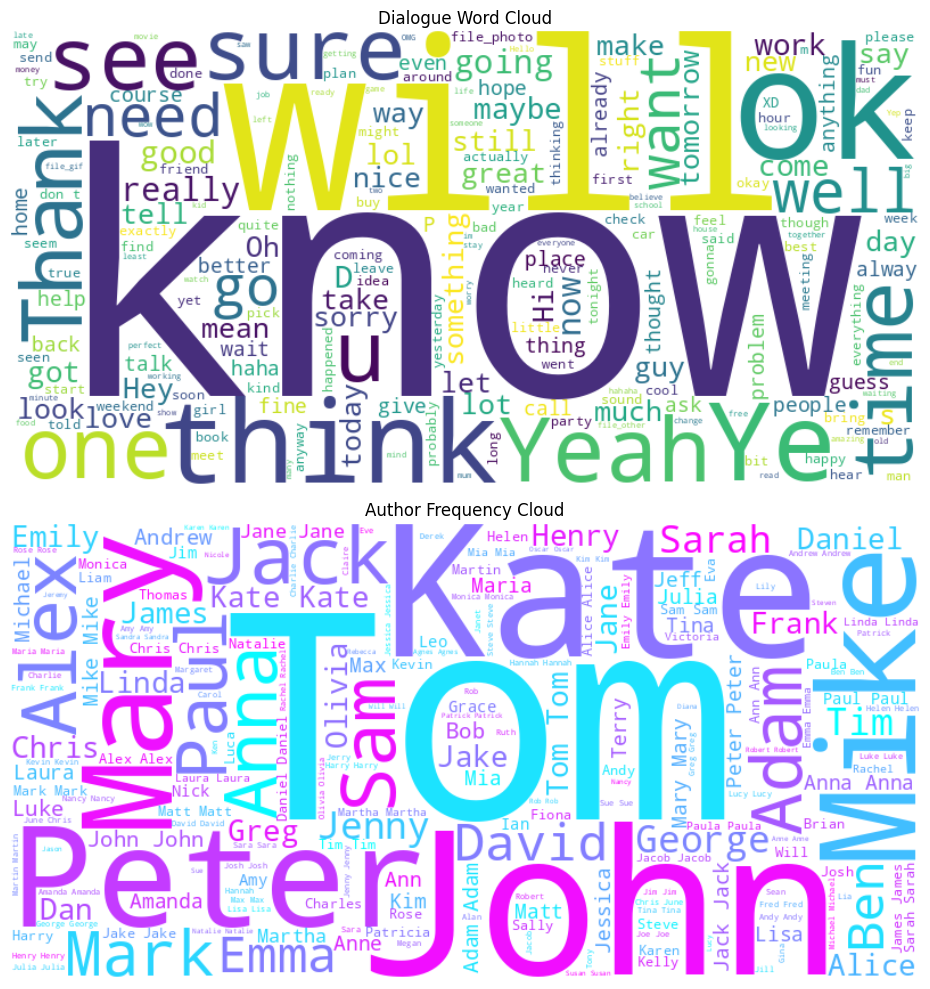

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

# Combine dialogue from all splits
full_dialogue = pd.concat([train["dialogue"], validate["dialogue"], test["dialogue"]], ignore_index=True)

# Lists for words and authors
all_text = []
all_authors = []

for entry in full_dialogue.dropna():
    lines = entry.strip().split("\n")
    for line in lines:
        parts = line.split(":", 1)
        if len(parts) == 2:
            speaker = parts[0].strip()
            utterance = parts[1].strip()
            all_authors.append(speaker)
            all_text.append(utterance)

# Join for word clouds
dialogue_text = " ".join(all_text)
authors_text = " ".join(all_authors)

# Generate word clouds
wordcloud_dialogue = WordCloud(width=800, height=400, background_color="white").generate(dialogue_text)
wordcloud_authors = WordCloud(width=800, height=400, background_color="white", colormap="cool").generate(authors_text)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
axes[0].imshow(wordcloud_dialogue, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Dialogue Word Cloud")

axes[1].imshow(wordcloud_authors, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Author Frequency Cloud")

plt.tight_layout()
plt.show()


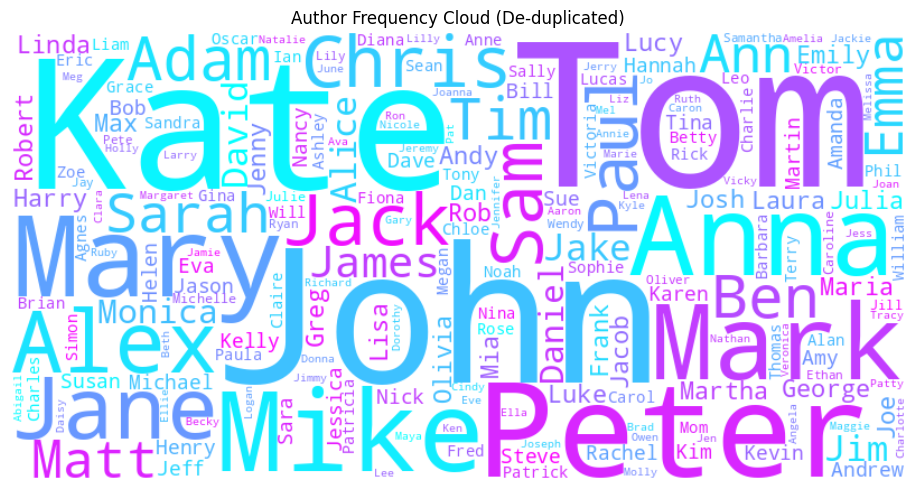

In [14]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Build a frequency dictionary
author_freq = Counter(all_authors)

# Generate author word cloud using frequencies
wordcloud_authors = WordCloud(width=800, height=400, background_color="white", colormap="cool")\
                    .generate_from_frequencies(author_freq)

# Display
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud_authors, interpolation="bilinear")
plt.axis("off")
plt.title("Author Frequency Cloud (De-duplicated)")
plt.tight_layout()
plt.show()
